In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

df = pd.read_csv('titanic.csv')

"""
Перед добавлением нового атрибута "причешим" наш датасет для корректного заполнения нового столбца
"""
# В первой ЛР были приведены слудеющие две строчки для нахождения пропущенных значений (мы обрабатывали только интересующие нас атрибуты) 
missing_counts = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].isnull().sum()
print("Пропущенные значения по столбцам:")
print(missing_counts)
print('\n')
# По результатам можно увидеть, что пропуски есть только у атрибута Age, поэтому обрабатывать пропуски только у этого атрибута 

# Заполним пропуски медианой:
median_age = int(df['Age'].median())
print(f"Медиана атрибута Age: {median_age}")

# df - изначальный датасет, dn - датасет с чистыми данными
dn = df
dn['Age'] = df['Age'].fillna(median_age)
missing_counts_after = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].isnull().sum()
print("Пропущенные значения после обработки:")
print(missing_counts_after)
print("\n")

# Поскольку пропущенные значения могут быть не только у рассматриваемых нами атрибутов, 
# но если мы удалим строки с пропущенными значениями у атрибутов, которые мы не будем обрабатывваеть, 
# то количество строк нашего дата фрейма уменьшится с 891 до 202.
clear = dn.dropna() 
num_rows = clear.shape[0]
print(f"Количество строк в датасете без пропусков: {num_rows}")
# Поскольку нам важны только вышеприведенные атрибуты, то удалять записи с другими атрибутыми не будет

# Удаляем повторяющиеся строки
dn = dn.drop_duplicates()

# На наличие выбросов датасет проверялся в прошлой ЛР. Предположительно, выбросами являются записи, где SibSp = 8 и Fare >= 500. Удалим эти записи 
dn = dn.drop(dn[(dn['Fare'] >= 500)].index)
dn = dn.drop(dn[(dn['SibSp'] == 8)].index)

Пропущенные значения по столбцам:
Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


Медиана атрибута Age: 28
Пропущенные значения после обработки:
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


Количество строк в датасете без пропусков: 202


In [5]:
"""
Поскольку возраст пассажиров указан в год первого плавания титаника (1912), 
то можем добавить* в качестве нового атрибута год рождения пассажира (ﾉ◕ヮ◕)ﾉ*:･ﾟ✧

*если не брать в расчет, что чей-то день рождения приходится на число с времени покупки билета 
(предполагая, что дата рождения указывалась при приобретении билета, а не посадки) и до кораблекрушения
"""
dn['year_of_birth'] = 1912 - dn['Age'].astype(int)
dn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,year_of_birth
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1890
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1874
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1886
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1877
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1877


Text(0, 0.5, 'Fare')

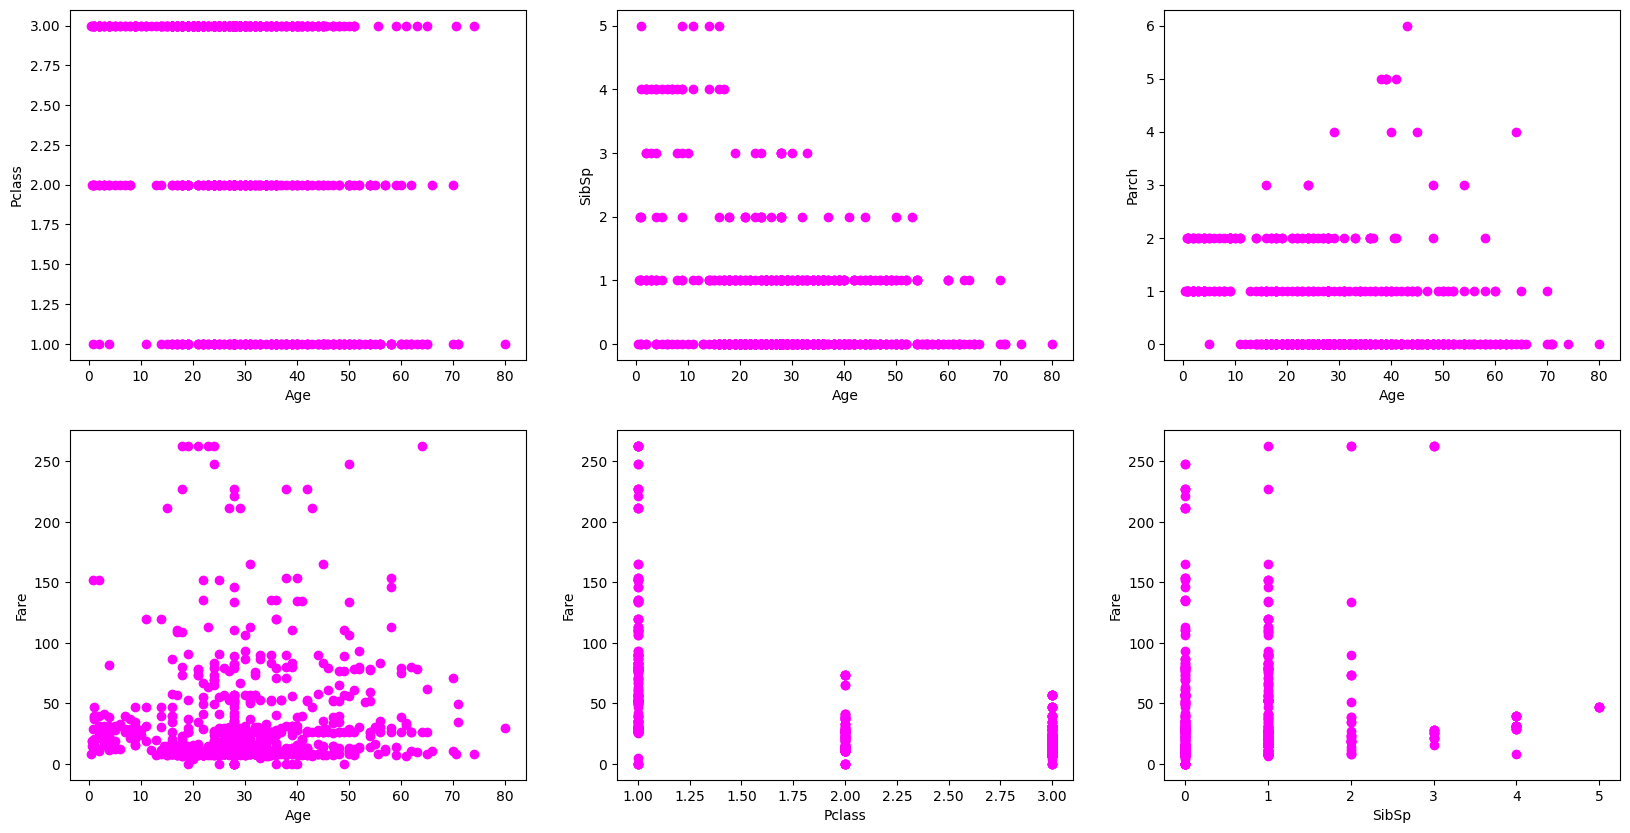

In [9]:
# Построим графики зависимости для некоторых атрибутов (наиболее инетерсных) (☞°ヮ°)☞ ☜(°ヮ°☜)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes[0,0].scatter(dn['Age'], dn['Pclass'], color='magenta', label='Точки')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Pclass')
axes[0,1].scatter(dn['Age'], dn['SibSp'], color='magenta', label='Точки')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('SibSp')
axes[0,2].scatter(dn['Age'], dn['Parch'], color='magenta', label='Точки')
axes[0,2].set_xlabel('Age')
axes[0,2].set_ylabel('Parch')

axes[1,0].scatter(dn['Age'], dn['Fare'], color='magenta', label='Точки')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Fare')
axes[1,1].scatter(dn['Pclass'], dn['Fare'], color='magenta', label='Точки')
axes[1,1].set_xlabel('Pclass')
axes[1,1].set_ylabel('Fare')
axes[1,2].scatter(dn['SibSp'], dn['Fare'], color='magenta', label='Точки')
axes[1,2].set_xlabel('SibSp')
axes[1,2].set_ylabel('Fare')

# На графике Age - SibSp можно заметить следующие два кластера: до 40 лет и после. До сорока лет у пассажиров много братьев/сестер, после сорока их сичло снижается.
# На графике Age - Parch млжно выделить 3 кластера: до 30, 30-50 и после 50. До 30 число детей/родственников увеличивается, в 30-50 достигает максимума и после 50 уменьшается. 

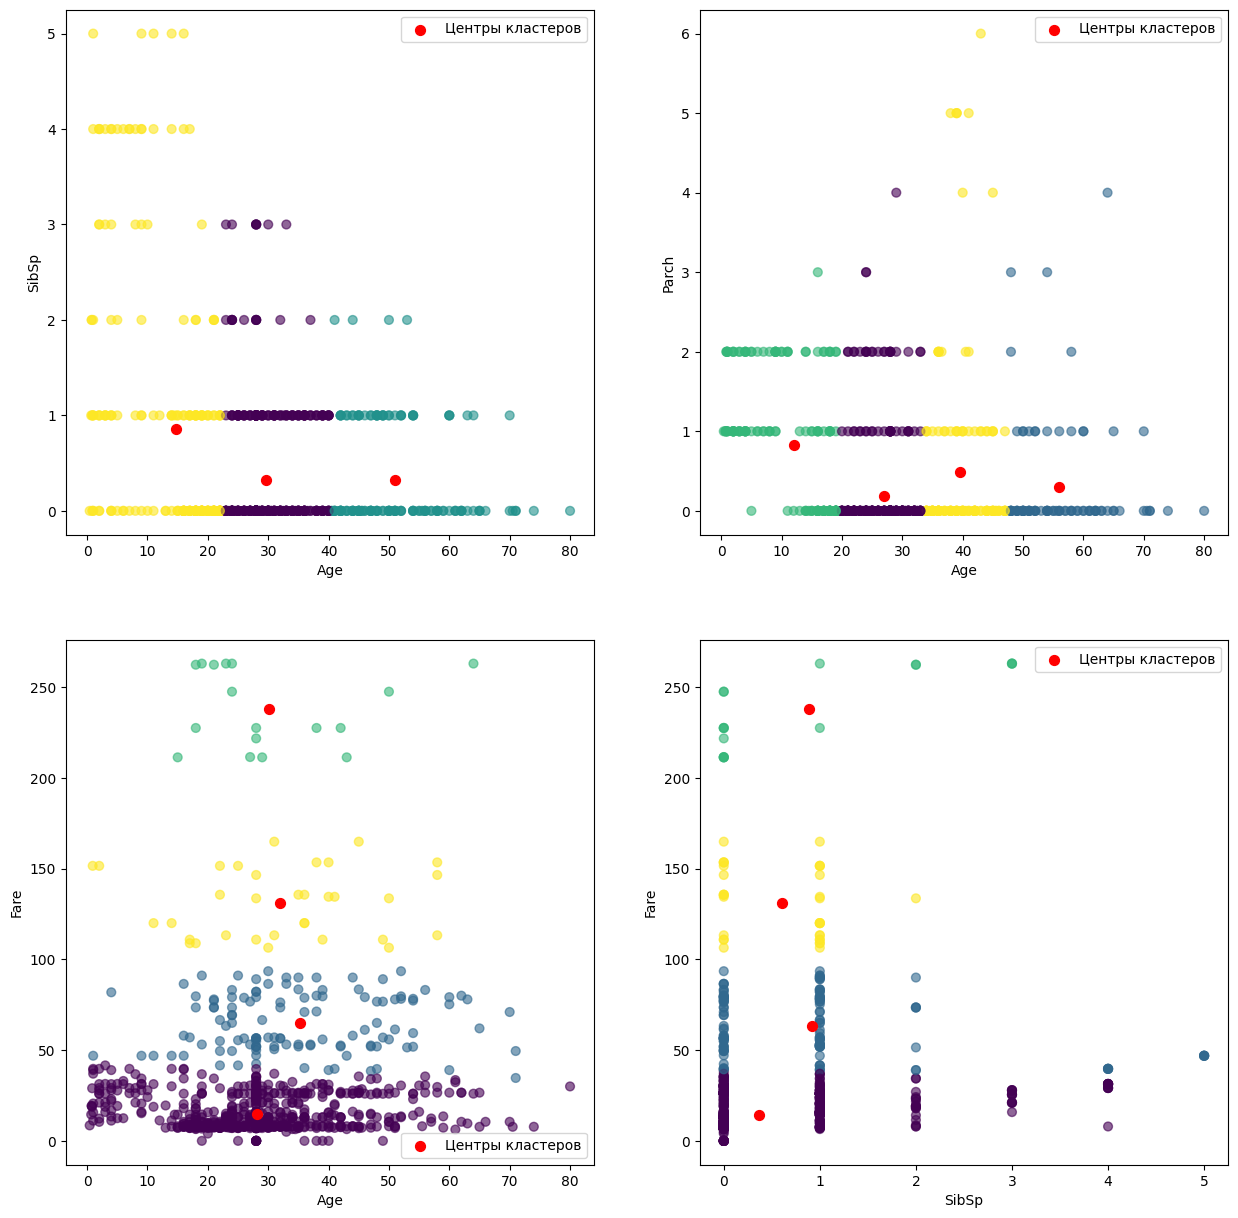

In [10]:
# Применем метод KMeans к нашему датасету
# Красными точками обозначены центры кластеров

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

#
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(dn[['Age', 'SibSp']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

axes[0,0].scatter(dn['Age'], dn['SibSp'], c=labels, cmap='viridis', s=40, alpha=0.6)
axes[0,0].scatter(centers[:, 0], centers[:, 1], c='red', marker='.', s=200, label='Центры кластеров')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('SibSp')
axes[0,0].legend()

#
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(dn[['Age', 'Parch']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

axes[0,1].scatter(dn['Age'], dn['Parch'], c=labels, cmap='viridis', s=40, alpha=0.6)
axes[0,1].scatter(centers[:, 0], centers[:, 1], c='red', marker='.', s=200, label='Центры кластеров')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Parch')
axes[0,1].legend()

#
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(dn[['Age', 'Fare']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

axes[1,0].scatter(dn['Age'], dn['Fare'], c=labels, cmap='viridis', s=40, alpha=0.6)
axes[1,0].scatter(centers[:, 0], centers[:, 1], c='red', marker='.', s=200, label='Центры кластеров')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Fare')
axes[1,0].legend()

#
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(dn[['SibSp', 'Fare']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

axes[1,1].scatter(dn['SibSp'], dn['Fare'], c=labels, cmap='viridis', s=40, alpha=0.6)
axes[1,1].scatter(centers[:, 0], centers[:, 1], c='red', marker='.', s=200, label='Центры кластеров')
axes[1,1].set_xlabel('SibSp')
axes[1,1].set_ylabel('Fare')
axes[1,1].legend()

In [11]:
"""
Вывод: 
Добавление новых атрибутов в набор данных предоставляет возможность расширить информацию и 
достичь более глубокого понимания данных, что в свою очередь обогащает анализ. 
Процесс очистки данных ("причесывание" датасета) важно по нескольким причинам:
    Корректность анализа: чистые данные предоставляют основу для точного и достоверного анализа. Ошибки в данных могут исказить результаты и привести к неверным выводам.
    Предотвращение искажений: присутствие выбросов, ошибок ввода, пропущенных значений и других аномалий может привести к искажениям при анализе. Очищенные данные помогают избежать этого.
    Эффективность моделирования: если вы планируете строить модели машинного обучения, то чистые данные являются ключевым предварительным условием. Модели, обученные на чистых данных, более вероятно, будут обобщаться на новые данные.
    Доверие к результатам: использование чистых данных повышает доверие к результатам анализа. Это особенно важно, если ваши выводы влияют на принятие решений.
Мы построили графики, чтобы:
    --предоставить визуальное представление данных, чтобы упростить восприятие и понимание сложных наборов данных. 
      Визуализация помогает обнаруживать закономерности, тренды и особенности, которые могли бы быть упущены при простом анализе числовых значений.
    --выявить кластеры и зависимости между переменными. 
Применили на практиме метод средних (k-means).
"""

'\nВывод: \nДобавление новых атрибутов в набор данных предоставляет возможность расширить информацию и \nдостичь более глубокого понимания данных, что в свою очередь обогащает анализ. \nПроцесс очистки данных ("причесывание" датасета) важно по нескольким причинам:\n    Корректность анализа: чистые данные предоставляют основу для точного и достоверного анализа. Ошибки в данных могут исказить результаты и привести к неверным выводам.\n    Предотвращение искажений: присутствие выбросов, ошибок ввода, пропущенных значений и других аномалий может привести к искажениям при анализе. Очищенные данные помогают избежать этого.\n    Эффективность моделирования: если вы планируете строить модели машинного обучения, то чистые данные являются ключевым предварительным условием. Модели, обученные на чистых данных, более вероятно, будут обобщаться на новые данные.\n    Доверие к результатам: использование чистых данных повышает доверие к результатам анализа. Это особенно важно, если ваши выводы влияют 